<IPython.core.display.Javascript object>


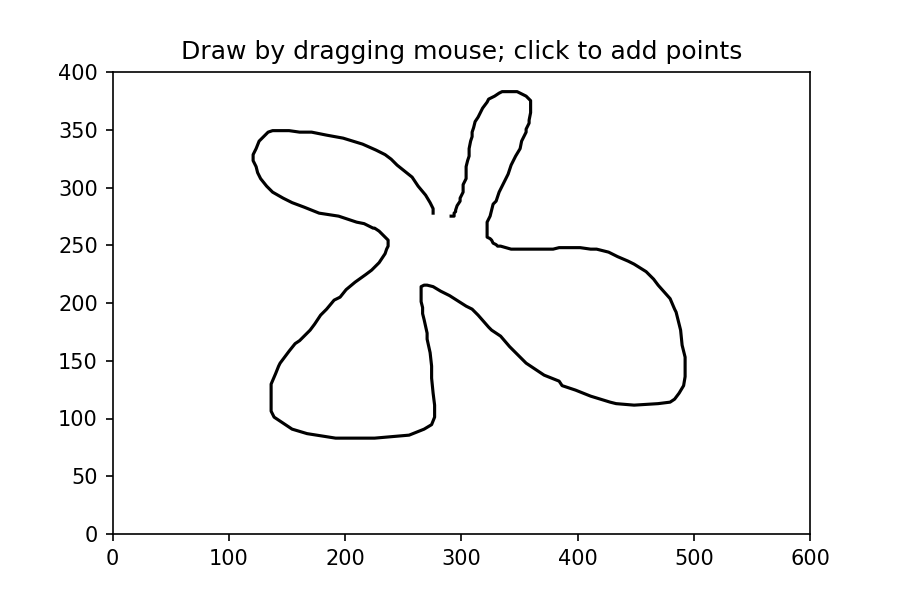

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Storage
drawn_strokes = []   # list of polylines
clicked_points = []  # list of points

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Draw by dragging mouse; click to add points")
ax.set_xlim(0, 600)
ax.set_ylim(0, 400)

drawing = False
current_line = []

# Mouse press
def on_press(event):
    global drawing, current_line
    if event.inaxes != ax: return
    drawing = True
    current_line = [[event.xdata, event.ydata]]
    drawn_strokes.append(current_line)

line, = ax.plot([], [], color="black")  # create once

def on_motion(event):
    if not drawing or event.inaxes != ax: return
    current_line.append([event.xdata, event.ydata])
    # update the data instead of plotting a new line
    xs, ys = zip(*current_line)
    line.set_data(xs, ys)
    fig.canvas.draw_idle()  # faster than draw()

# Mouse release
def on_release(event):
    global drawing
    drawing = False

# Mouse click for points
def on_click(event):
    if event.inaxes != ax: return
    clicked_points.append([event.xdata, event.ydata])
    ax.plot(event.xdata, event.ydata, "ro")
    fig.canvas.draw()

fig.canvas.mpl_connect("button_press_event", on_press)
fig.canvas.mpl_connect("motion_notify_event", on_motion)
fig.canvas.mpl_connect("button_release_event", on_release)
fig.canvas.mpl_connect("button_press_event", on_click)

plt.show()


In [4]:
drawn_strokes = [np.array(line) for line in drawn_strokes]
clicked_points = np.array(clicked_points)

print("Points:", clicked_points)
print("Number of strokes:", len(drawn_strokes))


Points: []
Number of strokes: 2


In [5]:
polygon1 = np.array(drawn_strokes[0])

In [6]:
polygon2 = np.array(drawn_strokes[1])

<IPython.core.display.Javascript object>


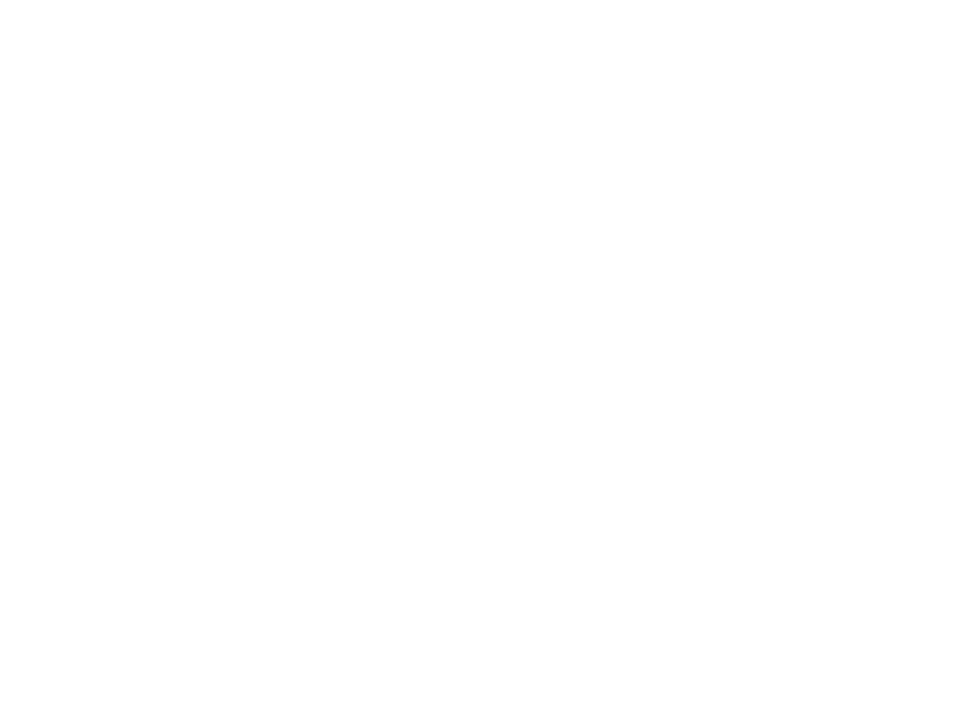

In [7]:
plt.plot(polygon1[:, 0], polygon1[:, 1])
plt.plot(polygon2[:, 0], polygon2[:, 1])

In [8]:
skip = 2
nArray = np.array([len(polygon1[::skip]), len(polygon2[::skip])])
vertices = np.concatenate((polygon1[::skip], polygon2[::skip]))
vertices /= (16 * np.max(np.abs(vertices)))

In [9]:
plt.clf()
plt.plot(vertices[:, 0], vertices[:, 1])
plt.show()

In [10]:
def h(pt1, pt2, startPoint):
    r1 = pt1 - startPoint
    r2 = pt2 - startPoint

    r1 -= np.round(r1)
    r2 -= np.round(r2)

    d = r2 - r1
    return (r1[0] + r2[0]) * d[1]

<IPython.core.display.Javascript object>


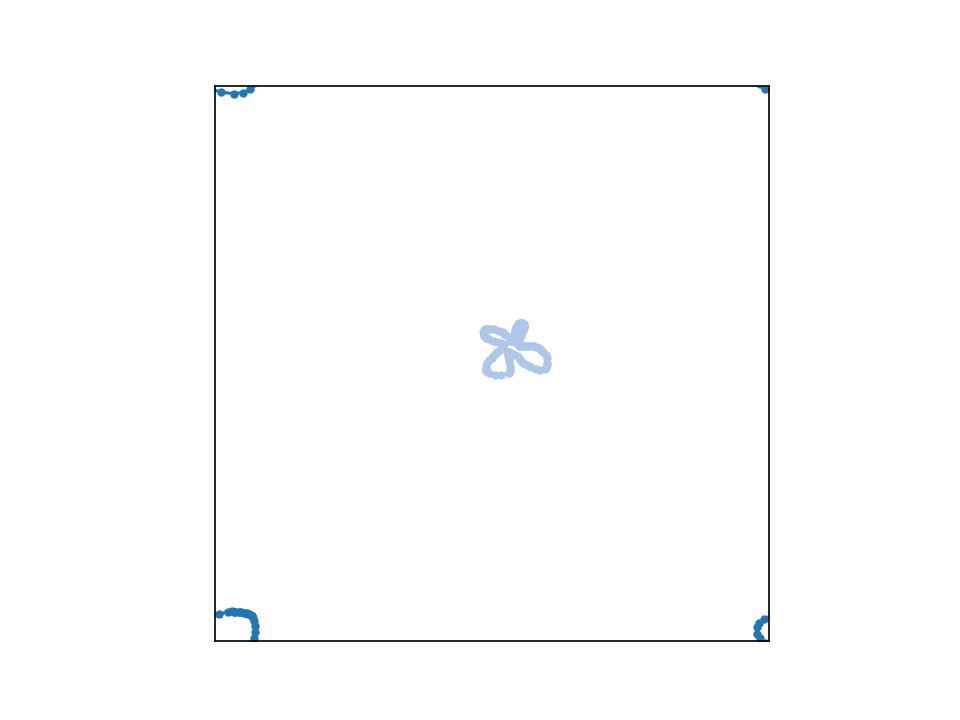

0 0.0


In [11]:
import sys, os
sys.path.insert(0, os.path.abspath("../pyCudaPolygon"))
import pyCudaPolygon as pcp
import numpy as np
from matplotlib import pyplot as plt
from pyCudaPolygonLink import libpyCudaPolygon as lpcp

m = pcp.model(size = len(vertices), seed = 0)
m.setModelEnum("normal")
m.setnArray(nArray)
vertices[nArray[0]:] += np.ones(2) / 2
m.setPositions(vertices.reshape(np.prod(vertices.shape)))
#m.setECPolygons(2)
# Set random polygon vertices positions
#m.setRandomPolygons()
# Make it so that all of the polygons have the same area
m.setMonoArea(phi = 0.01)
plt.clf()
ax = m.draw(numbering = False)
plt.show()

# Works fine
m.setMaxEdgeLength()
#ax = m.draw(numbering = False)
#plt.show()

# use default max edge length by finding it within the simulation
# You can adjust this later.
m.initializeNeighborCells()
m.updateNeighborCells()
m.updateNeighbors(0)
m.updateOverlapArea(1000)
olPY = m.getOverlapAreaPY(h)
oa = m.getOverlapArea()
print(m.getOverlapAreaPY(h), m.getOverlapArea())

In [ ]:
nArray